In [18]:
import pandas as pd
import numpy as np

In [85]:
train = pd.read_csv('train.csv', index_col=0)

In [86]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
y_col = 'Survived'
X_col = [c for c in train.columns if c != y_col]

In [89]:
x = train[X_col]
y = train[y_col]

In [90]:
x.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [91]:
x.shape

(891, 10)

In [13]:
object_cols = [c for t,c in zip(x.dtypes, x.columns) if t == np.dtype('object')]

,Name,Sex,Ticket,Cabin,Embarked
PassengerId,,,,,
1,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
5,"Allen, Mr. William Henry",male,373450,NaN,S


In [16]:
x[object_cols].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [92]:
def to_column(data, categorical_columns):
    new_column = data[categorical_columns]
    new_column = pd.get_dummies(data = new_column, prefix = categorical_columns)
    return new_column

In [93]:
categorical = to_column(data = x, categorical_columns = ['Sex','Embarked'])

In [94]:
categorical.head(10)

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,
1,0,1,0,0,1
2,1,0,1,0,0
3,1,0,0,0,1
4,1,0,0,0,1
5,0,1,0,0,1
6,0,1,0,1,0
7,0,1,0,0,1
8,0,1,0,0,1
9,1,0,0,0,1


In [99]:
categorical.shape

(891, 5)

In [101]:
x.shape

(891, 10)

In [102]:
x_fin = pd.concat([x, categorical],axis =1)

In [104]:
x_fin.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,0,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,0,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,0,0,1


In [103]:
x_fin.shape

(891, 15)

In [105]:
x_fin = x_fin.drop(['Embarked','Name','Sex','Cabin','Ticket'], axis = 1)

In [106]:
x_fin.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,38.0,1,0,71.2833,1,0,1,0,0
3,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,35.0,1,0,53.1000,1,0,0,0,1
5,3,35.0,0,0,8.0500,0,1,0,0,1


In [72]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [73]:
mm_scaler = MinMaxScaler()
s_scaler = StandardScaler()

In [107]:
X_scaled = s_scaler.fit_transform(mm_scaler.fit_transform(x_fin.fillna(0)))

In [108]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

In [109]:
X_scaled

array([[ 0.82737724, -0.10231279,  0.43279337, ..., -0.48204268,
        -0.30756234,  0.61930636],
       [-1.56610693,  0.80749164,  0.43279337, ...,  2.0745051 ,
        -0.30756234, -1.61470971],
       [ 0.82737724,  0.12513832, -0.4745452 , ..., -0.48204268,
        -0.30756234,  0.61930636],
       ..., 
       [ 0.82737724, -1.35329389,  0.43279337, ..., -0.48204268,
        -0.30756234,  0.61930636],
       [-1.56610693,  0.12513832, -0.4745452 , ...,  2.0745051 ,
        -0.30756234, -1.61470971],
       [ 0.82737724,  0.46631498, -0.4745452 , ..., -0.48204268,
         3.25137334, -1.61470971]])

In [121]:
knn = KNeighborsClassifier(n_neighbors=15)
result_knn = cross_val_score(cv=5,
                            estimator=knn, 
                            X=X_scaled,
                            y=y,
                            scoring='accuracy'
                           )
result_knn.mean()

0.80246440599946034

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, log_loss
from sklearn.externals import joblib

In [128]:
rf = RandomForestClassifier(max_features=5,max_depth=2,n_estimators=300)
result_rf = cross_val_score(cv=10,
                            estimator=rf, 
                            X=X_scaled,
                            y=y,
                            scoring='accuracy'
                           )
result_rf.mean()

0.78558705027806153

In [123]:
logres = LogisticRegression(C=20,)
result_lr = cross_val_score(cv=5,
                            estimator=logres, 
                            X=X_scaled,
                            y=y,
                            scoring='accuracy'
                           )
result_lr.mean()

0.78341998881475805

In [124]:
nb = GaussianNB()
result_nb = cross_val_score(cv=5,
                            estimator=nb, 
                            X=X_scaled,
                            y=y,
                            scoring='accuracy'
                           )
result_nb.mean()

0.78790788098533682

In [117]:
from xgboost import XGBClassifier


In [126]:
xgb = XGBClassifier(max_depth=2, learning_rate=0.001)
result_xgb = cross_val_score(cv=10,
                            estimator=xgb, 
                            X=X_scaled,
                            y=y,
                            scoring='accuracy'
                           )
result_xgb.mean()

0.77333985926682558

## Speedml

In [22]:
from speedml import Speedml

In [26]:
sml = Speedml('train.csv',
             'test.csv',
             target='Survived',
             uid='PassengerId')

In [29]:
sml.shape()

'train (891, 11) | test (418, 10)'

In [30]:
sml.eda()

,Results,Observations
Speedml Release,v0.9.3,Visit https://speedml.com for release notes.
Nulls,1014,Use feature.impute.
Outliers Upper,"[SibSp, Fare]",Positive skew (> 3). Use feature.outliers(upper).
Shape,"train (891, 11) | test (418, 10)",
Numerical Ratio,54%,Aim for 100% numerical.
Numerical High-cardinality,"[Age, Fare]",(>10) categories. Use feature.density
Numerical Categorical,"[Survived, Pclass, SibSp, Parch]",Use plot.ordinal.
Text High-cardinality,"[Cabin, Ticket]",(>10) categories. Use feature.labels.
Text Categorical,"[Sex, Embarked]",Use feature.labels or feature.mapping.
Text Unique,[Name],~80% unique. Use feature.extract or feature.drop.


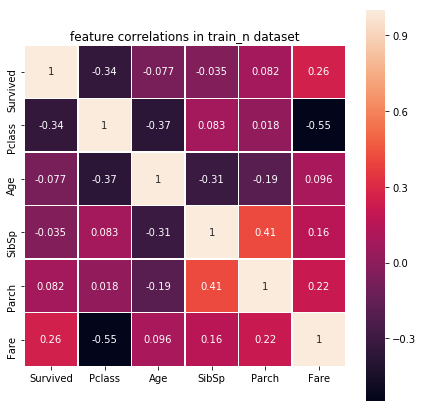

In [31]:
sml.plot.correlate()

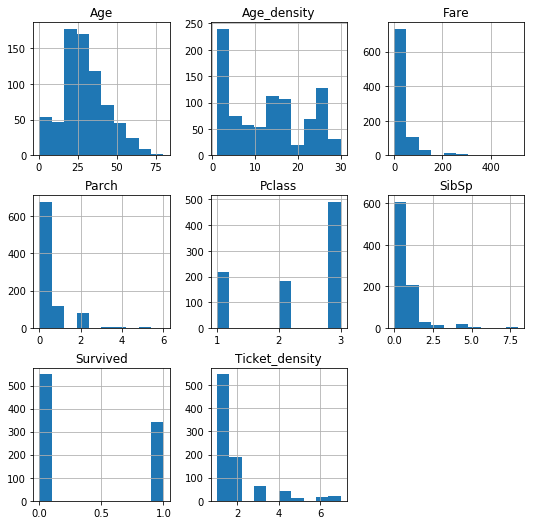

In [40]:
sml.plot.distribute()

In [39]:
sml.feature.density('Ticket')

In [41]:
sml.train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_density,Ticket_density
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,27,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,11,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,18,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,18,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,18,1
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,1
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,8,1
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,10,4
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,18,3
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,6,2


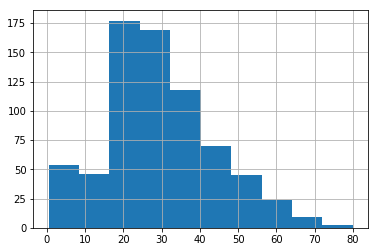

In [45]:
sml.train['Age'].hist()

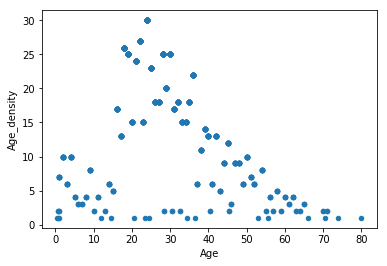

In [48]:
sml.train.plot.scatter('Age','Age_density')